# Описание проекта:

    
   В ходе аналатического проекта необходимо проанализировать два тарифа "Ультра" и "Смарт" компании «Мегалайн» — федерального оператора сотовой связи. Предварительный анализ тарифов будем проводить на небольшой выборке клиентов (500 человек). Выборка включает в себя данные о пользователе (ФИО, тариф, интернет трафик, сколько звонков и сообщений каждый отправил за 2018 год. и тд.) 

# Цель:
Определить лучший тарифный план оператора, приносящий больше денежных средств.

# План проекта:
 1. Описать поведение клиентов оператора, исходя из выборки. Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение для данных параметров. Построить гистограммы. Описать распределения.
 
 
 2. Проверить гипотезы:
   * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
   * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
   
   
 3. Написать общий вывод о проведённом анализе
 
# Описание тарифов:
**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   * минута разговора: 3 рубля
   * сообщение: 3 рубля
   * 1 Гб интернет-трафика: 200 рублей
   
   
**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   * минута разговора: 1 рубль
   * сообщение: 1 рубль
   * 1 Гб интернет-трафика: 150 рублей

# Оглавление
## [Открытие данных](#1) 
## [Предобработка данных](#2) 
## [Анализ данных](#3) 
## [Проверка гипотез](#4)
## [Общий вывод](#5)

### Шаг 1. Откроем файл с данными и изучим общую информацию.<a id="1"></a>

In [1]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

data_calls.info()
print()
data_internet.info()
print()
data_messages.info()
print()
data_tariffs.info()
print()
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

<class 'pandas.core.frame.DataFrame'>
R

In [2]:
# визуально осмотрим первые пять строк из датафрейма:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# визуально осмотрим первые пять строк из датафрейма:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
# визуально осмотрим первые пять строк из датафрейма:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
# визуально осмотрим первые пять строк из датафрейма:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
# визуально осмотрим первые пять строк из датафрейма:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
# рассмотрим числовое описание датафрейма:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [8]:
# рассмотрим числовое описание датафрейма:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [9]:
# рассмотрим числовое описание датафрейма:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод:

Достаточно чистые данные. Есть некоторые нюансы, которые мы исправим на предобработке данных.
* Заменим тип данных на специальный тип дата;
* Округлим данные, согласно специфики работы оператора.

### Шаг 2. Подготовим данные:<a id="2"></a>

#### Внесем правки в датафрейм звонки:

In [10]:
# Определим кол-во пропущенных значений:
data_calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [11]:
# Переведем дату в понятный вид:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_calls['call_date_month'] = data_calls['call_date'].astype('datetime64[M]')

In [12]:
data_calls.head()

,id,call_date,duration,user_id,call_date_month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01


In [13]:
# Поменяем тип данных для столбца время разговора и округлим в большую сторону:
data_calls['duration'] = (np.ceil(data_calls['duration'])).astype(int)

In [14]:
# Проверим изменения:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id                 202607 non-null object
call_date          202607 non-null datetime64[ns]
duration           202607 non-null int64
user_id            202607 non-null int64
call_date_month    202607 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 7.7+ MB


#### Внесем правки в датафрейм интернет:

In [15]:
# Определим кол-во пропущенных значений:
data_internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [16]:
# Переведем дату в понятный вид:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
#data_internet['internet_date_month'] = data_internet['session_date'].dt.month
data_internet['internet_date_month'] = data_internet['session_date'].astype('datetime64[M]')

In [17]:
# Поменяем тип данных для столбца время разговора и округлим в большую сторону:
data_internet['mb_used'] = (np.ceil(data_internet['mb_used'])).astype(int)

In [18]:
# Проверим изменения:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0             149396 non-null int64
id                     149396 non-null object
mb_used                149396 non-null int64
session_date           149396 non-null datetime64[ns]
user_id                149396 non-null int64
internet_date_month    149396 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 6.8+ MB


#### Внесем правки в датафрейм сообщения:

In [19]:
# Определим кол-во пропущенных значений:
data_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
# Переведем дату в понятный вид:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
#data_messages['message_date_month'] = data_messages['message_date'].dt.month
data_messages['message_date_month'] = data_messages['message_date'].astype('datetime64[M]')

In [21]:
# Проверим изменения:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id                    123036 non-null object
message_date          123036 non-null datetime64[ns]
user_id               123036 non-null int64
message_date_month    123036 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 3.8+ MB


#### Внесем правки в датафрейм пользователи:

In [22]:
# Определим кол-во пропущенных значений:
data_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [23]:
# Переведем дату в понятный вид:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format = '%Y-%m-%d')

In [24]:
# Переведем дату в понятный вид:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')

In [25]:
# Проверим изменения:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Посчитаем для каждого пользователя:

In [26]:
# Посчитаем количество звонков и израсходованных минут разговора по месяцам пользователей:
calls_group = data_calls.groupby(['user_id', 'call_date_month']).agg({'duration': ['sum','count']}).reset_index()

display(calls_group)

user_id call_date_month duration      
                                  sum count
0       1000      2018-05-01      159    22
1       1000      2018-06-01      172    43
2       1000      2018-07-01      340    47
3       1000      2018-08-01      408    52
4       1000      2018-09-01      466    58
...      ...             ...      ...   ...
3169    1498      2018-10-01      247    41
3170    1499      2018-09-01       70     9
3171    1499      2018-10-01      449    68
3172    1499      2018-11-01      612    74
3173    1499      2018-12-01      492    69

[3174 rows x 4 columns]

In [27]:
# Переменуем столбцы в таблице звонки:
calls_group.columns = ['user_id','date_month','sum_calls_month','count_calls_month']
display(calls_group)

,user_id,date_month,sum_calls_month,count_calls_month
0,1000,2018-05-01,159,22
1,1000,2018-06-01,172,43
2,1000,2018-07-01,340,47
3,1000,2018-08-01,408,52
4,1000,2018-09-01,466,58
...,...,...,...,...
3169,1498,2018-10-01,247,41
3170,1499,2018-09-01,70,9
3171,1499,2018-10-01,449,68
3172,1499,2018-11-01,612,74


In [28]:
# Посчитаем кол-во отправленных сообщений по месяцам пользователей:
messages_group = data_messages.groupby(['user_id', 'message_date_month']).agg({'id': 'count'}).reset_index()
display(messages_group)

,user_id,message_date_month,id
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [29]:
# Переменуем столбцы в таблиц сообщения:
messages_group.columns = ['user_id','date_month','count_message_month']
display(messages_group)

,user_id,date_month,count_message_month
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [30]:
# Посчитаем объем израсходованного интернет-трафика по месяцам пользователей:
internet_group = data_internet.groupby(['user_id', 'internet_date_month']).agg({'mb_used':'sum'}).reset_index()
internet_group.columns = ['user_id','date_month','mb_used']
display(internet_group)

,user_id,date_month,mb_used
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
...,...,...,...
3198,1498,2018-10-01,20604
3199,1499,2018-09-01,1848
3200,1499,2018-10-01,17809
3201,1499,2018-11-01,17984


In [31]:
# Объединим все таблицы в одну:
total_data = ( messages_group.merge(internet_group, on=['user_id','date_month'], how='outer')
              .merge(calls_group, on=['user_id','date_month'], how='outer')
              .merge(data_users,on='user_id', how='outer')
              .merge(data_tariffs, left_on = 'tariff', right_on = 'tariff_name',how='outer')
             )

In [32]:
# Проверим нашу таблицу:
display(total_data)

,user_id,date_month,count_message_month,mb_used,sum_calls_month,count_calls_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05-01,22.0,2256.0,159.0,22.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06-01,60.0,23257.0,172.0,43.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07-01,75.0,14016.0,340.0,47.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08-01,81.0,14070.0,408.0,52.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09-01,57.0,14581.0,466.0,58.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,2018-09-01,NaN,16986.0,501.0,66.0,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15360,500,550,200,3,3,smart
3212,1494,2018-10-01,NaN,17794.0,354.0,52.0,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15360,500,550,200,3,3,smart
3213,1494,2018-11-01,NaN,18076.0,411.0,63.0,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15360,500,550,200,3,3,smart
3214,1494,2018-12-01,NaN,17645.0,418.0,62.0,62,NaT,Омск,Ренат,...,2018-08-17,smart,50,15360,500,550,200,3,3,smart


In [33]:
# Заменим пропущенные значение в mb_used на 0:
total_data['mb_used'] = total_data['mb_used'].fillna(0)

In [34]:
# Заменим пропущенные значение в sum_calls_month на 0:
total_data['sum_calls_month'] = total_data['sum_calls_month'].fillna(0)

In [35]:
# Заменим пропущенные значение в count_calls_month на 0:
total_data['count_calls_month'] = total_data['count_calls_month'].fillna(0)

In [36]:
# Заменим пропущенные значение в count_message_month на 0:
total_data['count_message_month'] = total_data['count_message_month'].fillna(0)

In [37]:
# Функция для того, чтобы посчитать общий доход с каждого клиента в месяц:
def total_profit(row):
    calls_profit= (row['sum_calls_month'] - row['minutes_included']) * row['rub_per_minute']
    if calls_profit < 0: calls_profit = 0
        
    message_profit = (row['count_message_month'] - row['messages_included']) *row['rub_per_message']
    if  message_profit < 0:  message_profit = 0

    internet_profit = (row['mb_used'] - row['mb_per_month_included']) / 1024 *row['rub_per_gb']
    if  internet_profit < 0:  internet_profit = 0

    total_profit = calls_profit + message_profit + internet_profit + row['rub_monthly_fee']
    return total_profit

In [38]:
# Добавим новый столбец Общий доход с каждого клиента в месяц в наш датафрейм с помощью метода apply:
total_data['total_profit']= total_data.apply(total_profit, axis =1)

In [39]:
# Проверим заполнение данных:
display(total_data)

,user_id,date_month,count_message_month,mb_used,sum_calls_month,count_calls_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_profit
0,1000,2018-05-01,22.0,2256.0,159.0,22.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.000000
1,1000,2018-06-01,60.0,23257.0,172.0,43.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.000000
2,1000,2018-07-01,75.0,14016.0,340.0,47.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.000000
3,1000,2018-08-01,81.0,14070.0,408.0,52.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.000000
4,1000,2018-09-01,57.0,14581.0,466.0,58.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1494,2018-09-01,0.0,16986.0,501.0,66.0,62,NaT,Омск,Ренат,...,smart,50,15360,500,550,200,3,3,smart,870.578125
3212,1494,2018-10-01,0.0,17794.0,354.0,52.0,62,NaT,Омск,Ренат,...,smart,50,15360,500,550,200,3,3,smart,1025.390625
3213,1494,2018-11-01,0.0,18076.0,411.0,63.0,62,NaT,Омск,Ренат,...,smart,50,15360,500,550,200,3,3,smart,1080.468750
3214,1494,2018-12-01,0.0,17645.0,418.0,62.0,62,NaT,Омск,Ренат,...,smart,50,15360,500,550,200,3,3,smart,996.289062


### Вывод:

* Исправили ошибки, которые были обнаружены ранее;
* Объединил все таблицы в одну;
* Посчитали для каждого пользователя ( кол-во звонков,смс, мегабайты, израсходованные минуты и интернет трафик)
* Нашли выручку с каждого пользователя.

### Шаг 3. Проанализируем данные:<a id="3"></a>

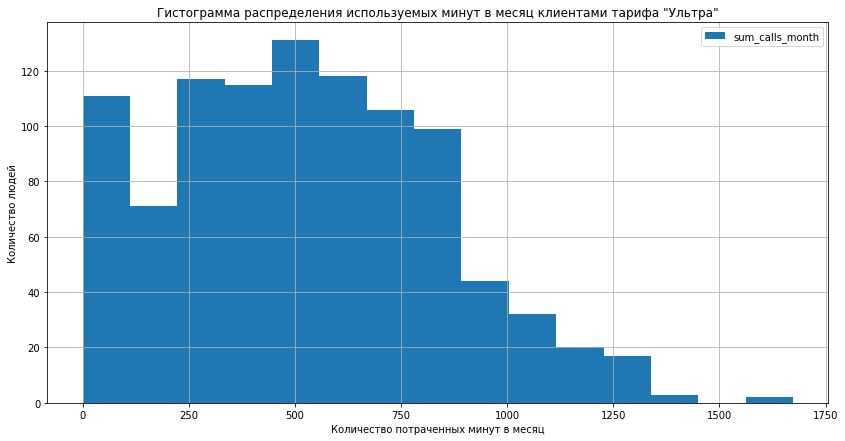

In [40]:
# Построим гистограмму по количеству минут потраченных в месяц на тарфие ультра:
total_data.query('tariff_name == "ultra"').plot(y ="sum_calls_month",kind='hist', bins=15, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения используемых минут в месяц клиентами тарифа "Ультра"')
plt.xlabel('Количество потраченных минут в месяц')
plt.ylabel('Количество людей')
plt.show()

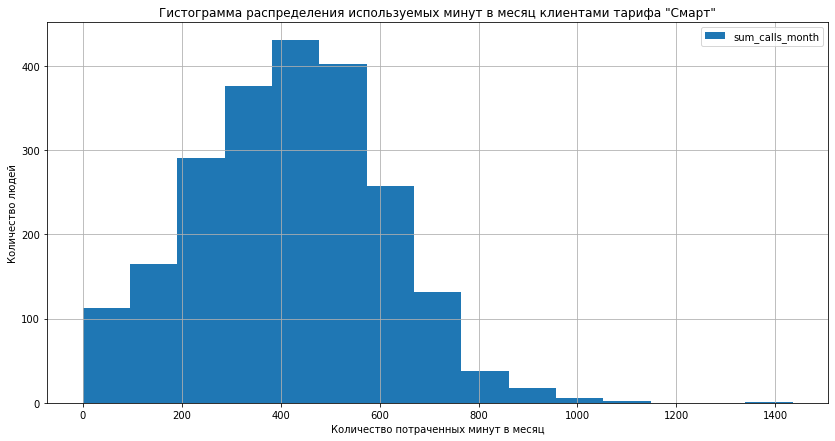

In [41]:
# Построим гистограмму по количеству минут потраченных в месяц на тарифе смарт:
total_data.query('tariff_name == "smart"').plot(y ="sum_calls_month",kind='hist', bins=15, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения используемых минут в месяц клиентами тарифа "Смарт"')
plt.xlabel('Количество потраченных минут в месяц')
plt.ylabel('Количество людей')
plt.show()

# Вывел две зависимости вместе по кол-ву минут для тарифов

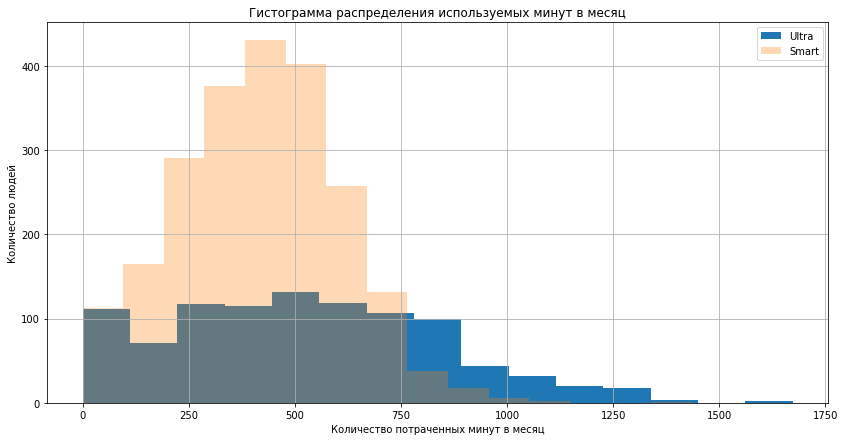

In [42]:
ax=total_data.query('tariff_name == "ultra"').plot(y ="sum_calls_month",kind='hist', bins=15, figsize=(14, 7), grid=True, label='Ultra')
total_data.query('tariff_name == "smart"').plot(y ="sum_calls_month",kind='hist', bins=15, figsize=(14, 7), grid=True,ax=ax, alpha=0.3, label='Smart')
plt.title('Гистограмма распределения используемых минут в месяц')
plt.xlabel('Количество потраченных минут в месяц')
plt.ylabel('Количество людей')
plt.legend()
plt.show()

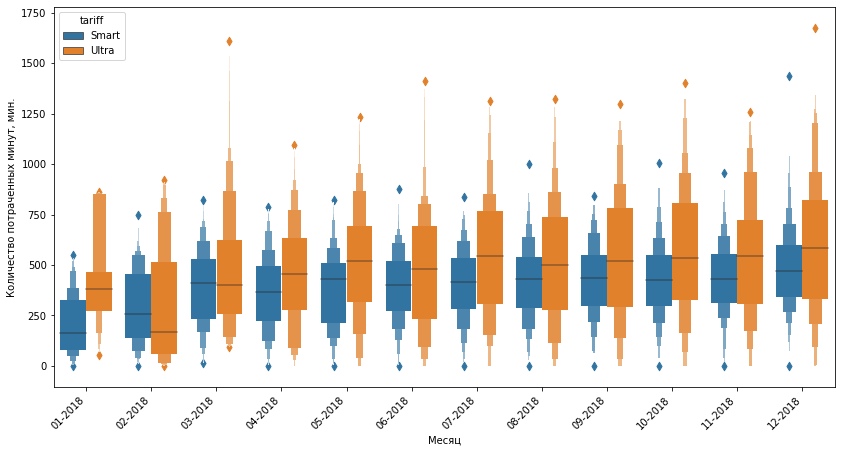

In [43]:
# Построим категориальный график потраченные минуты в каждом месяце для каждого тарифа:
data_ultra = total_data.query('tariff_name == "ultra"')
data_smart = total_data.query('tariff_name == "smart"')

data_ultra['tariff'] = 'Ultra'
data_smart['tariff'] = 'Smart'

temp = pd.concat([data_ultra, data_smart])
df_rev = temp.dropna(subset=['date_month']).sort_values('date_month').reset_index(drop=True)
plt.figure(figsize=(14, 7))
sns.boxenplot(x=df_rev['date_month'].dt.strftime('%m-%Y'), y=df_rev['sum_calls_month'],  hue=df_rev['tariff'])
plt.xlabel('Месяц')
plt.ylabel('Количество потраченных минут, мин.')
plt.xticks(rotation=45, ha='right')
plt.show()

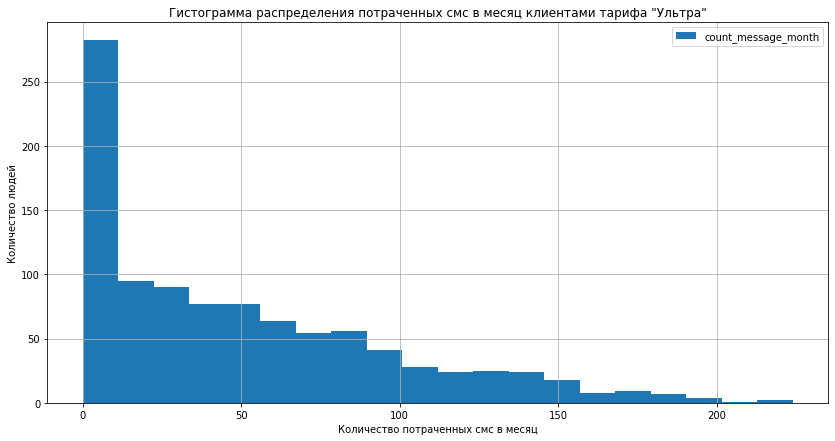

In [44]:
# Построим гистограмму по количеству смс потраченных в месяц на тарфие ультра:
total_data.query('tariff_name == "ultra"').plot(y ="count_message_month",kind='hist', bins=20, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения потраченных смс в месяц клиентами тарифа "Ультра"')
plt.xlabel('Количество потраченных смс в месяц')
plt.ylabel('Количество людей')
plt.show()

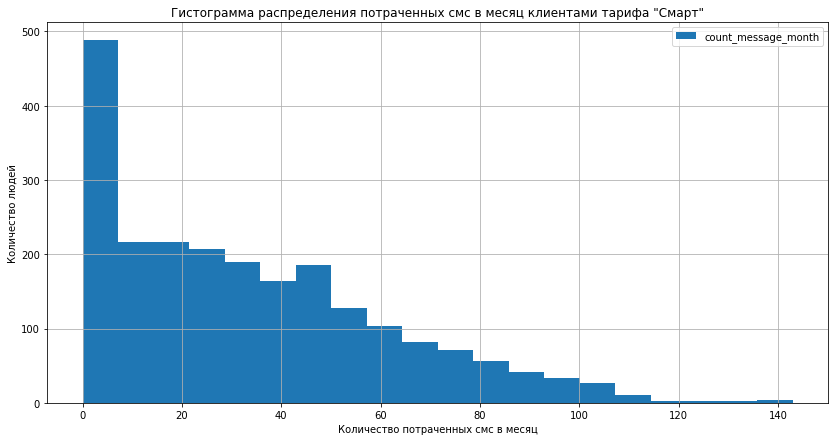

In [45]:
# Построим гистограмму по количеству смс потраченных в месяц на тарифе смарт:
total_data.query('tariff_name == "smart"').plot(y ="count_message_month",kind='hist', bins=20, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения потраченных смс в месяц клиентами тарифа "Смарт"')
plt.xlabel('Количество потраченных смс в месяц')
plt.ylabel('Количество людей')
plt.show()

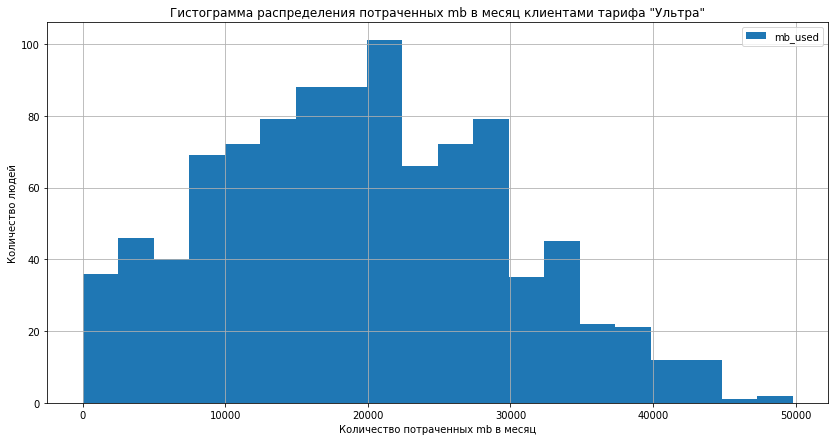

In [46]:
# Построим гистограмму по количеству mb потраченных в месяц на тарфие ультра:
total_data.query('tariff_name == "ultra"').plot(y ="mb_used",kind='hist', bins=20, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения потраченных mb в месяц клиентами тарифа "Ультра"')
plt.xlabel('Количество потраченных mb в месяц')
plt.ylabel('Количество людей')
plt.show()

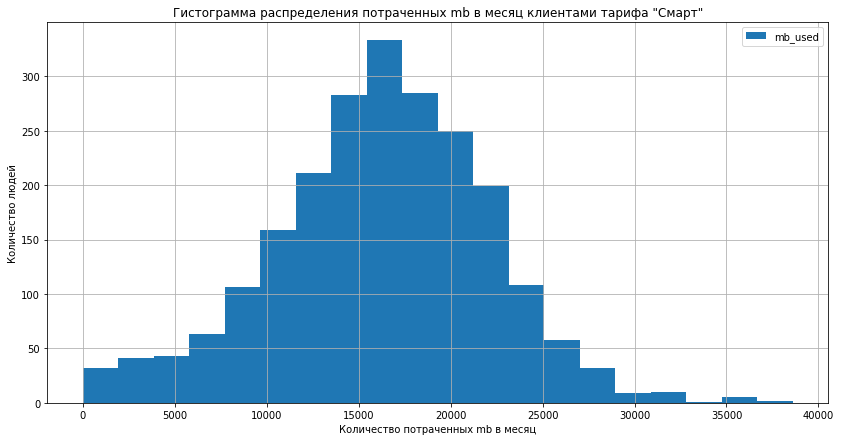

In [47]:
# Построим гистограмму по количеству mb потраченных в месяц на тарифе смарт:
total_data.query('tariff_name == "smart"').plot(y ="mb_used",kind='hist', bins=20, figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения потраченных mb в месяц клиентами тарифа "Смарт"')
plt.xlabel('Количество потраченных mb в месяц')
plt.ylabel('Количество людей')
plt.show()

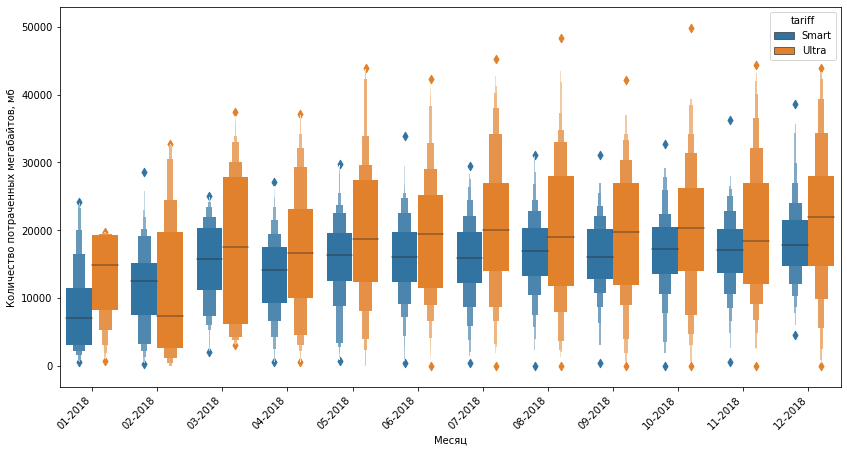

In [48]:
# Построим категориальный график потраченные мегабайты в каждом месяце для каждого тарифа:

data_ultra['tariff'] = 'Ultra'
data_smart['tariff'] = 'Smart'

temp = pd.concat([data_ultra, data_smart])
plt.figure(figsize=(14, 7))
sns.boxenplot(x=df_rev['date_month'].dt.strftime('%m-%Y'), y=df_rev['mb_used'],  hue=df_rev['tariff'])
plt.xlabel('Месяц')
plt.ylabel('Количество потраченных мегабайтов, мб')
plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
# Создадим сводную таблицу, где для каждого тарифа найдем медиану,  среднее, дисперсию и стандартное отклонение для интересующих нас столбцов:
display(total_data.pivot_table(index = 'tariff_name',values=['sum_calls_month','count_message_month','mb_used'],aggfunc=['median','mean','var','std','count']).T)

tariff_name                        smart         ultra
median count_message_month  2.800000e+01  3.800000e+01
       mb_used              1.652900e+04  1.932000e+04
       sum_calls_month      4.215000e+02  5.180000e+02
mean   count_message_month  3.336906e+01  4.931339e+01
       mb_used              1.622191e+04  1.946714e+04
       sum_calls_month      4.177475e+02  5.260892e+02
var    count_message_month  7.969553e+02  2.285417e+03
       mb_used              3.464852e+07  1.022173e+08
       sum_calls_month      3.628139e+04  1.010525e+05
std    count_message_month  2.823040e+01  4.780604e+01
       mb_used              5.886300e+03  1.011026e+04
       sum_calls_month      1.904768e+02  3.178875e+02
count  count_message_month  2.230000e+03  9.860000e+02
       mb_used              2.230000e+03  9.860000e+02
       sum_calls_month      2.230000e+03  9.860000e+02

In [50]:
# Посчитаем сколько средний пользователь тарифа ультра тратит в месяц:
total_data[total_data['tariff_name'] =="ultra"]['total_profit'].mean()

2060.417871688007

In [51]:
# Посчитаем сколько средний пользователь тарифа смарт тратит в месяц:
total_data[total_data['tariff_name'] =="smart"]['total_profit'].mean()

1233.0430318105382

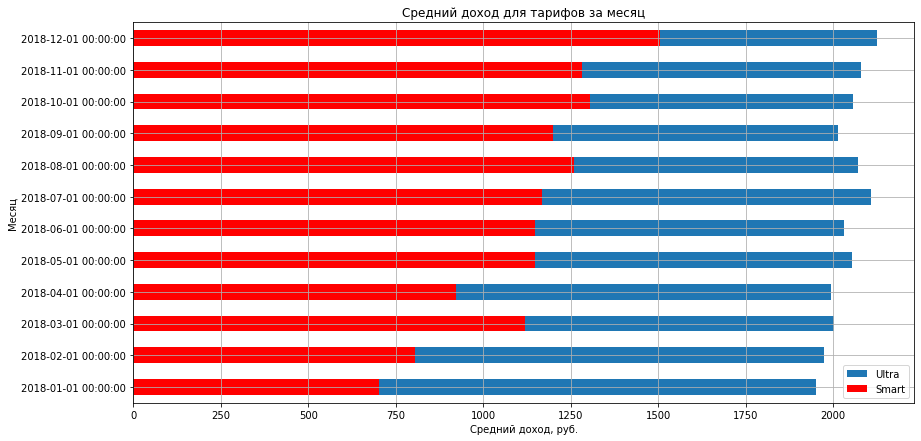

In [52]:
# Построим график зависимости среднего дохода для каждого тарифа за месяц:
ax = (data_ultra
 .pivot_table(index = 'date_month', values = 'total_profit', aggfunc='mean' )
 .plot(y='total_profit', kind='barh', title='Средний доход для тарифов за месяц', figsize=(14, 7), grid=True, label='Ultra')
)
(data_smart
 .pivot_table(index = 'date_month', values = 'total_profit', aggfunc='mean' )
 .plot(y='total_profit', kind='barh', title='Средний доход для тарифов за месяц', figsize=(14, 7), grid=True,ax=ax,color='r', label='Smart')
)
plt.xlabel('Средний доход, руб.')
plt.ylabel('Месяц')
plt.show()

### Вывод:

Проведя построение гистограм распределения данных,укажем обычное потребеление пользователем минут,смс и мегабайт:
Потраченные минуты:

* Для пользователей тарифа Смарт: 400-550 мин.
* Для пользователей тарифа Ультра: 500 мин.

Потраченные смс:

* Для пользователей тарифа Смарт: 20 шт.
* Для пользователей тарифа Ультра: 10 шт.

Потраченные мегабайты интернета:

* Для пользователей тарифа Смарт: около 16 Гб.
* Для пользователей тарифа Ультра: около 20 Гб.

### Шаг 4. Проверим гипотезы:<a id="4"></a>

#### Проверим гипотезу №1.

Сформулируем гипотезы:
* H0:Средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается
* H1:Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [53]:
# Найдем диспресию для двух выборок тестом Левена:
from scipy.stats import levene
a=total_data[total_data['tariff_name'] =="ultra"]['total_profit']
b=total_data[total_data['tariff_name'] =="smart"]['total_profit']
stat, p = levene(a,b)
display(p)

2.3978183884958415e-115

In [54]:
# Найдем диспресию для двух выборок тестом Бартлетта: 
from scipy.stats import bartlett
stat, pp = bartlett(a, b)
display(pp)

1.1273347694424213e-146

Малое значение p (при проверке тестом Левена и Бартлетта) говорит нам, что дисперсия для двух выборк не совпадает, значит при проверки нулевой гипотезы будем использовать st.ttest_ind аргумент equal_var=False т.к. он говорит методу что диспресия выборок не равны.

In [55]:
array1 = total_data[total_data['tariff_name'] =="ultra"]['total_profit']
array2 = total_data[total_data['tariff_name'] =="smart"]['total_profit']

alpha = .05 

results = st.ttest_ind(array1,array2, equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 3.665639404941008e-296
Отвергаем нулевую гипотезу


#### Вывод:

Полученное р-значение очень маленькое, поэтому нулевая гипотеза была отвергнута. Средняя выручка с пользователей тарифа "Смарт" и тарифа "Ультра" отличается.

#### Проверим гипотезу №2.

Сформулируем гипотезы:
* H0:Cредняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов
* H1:Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [56]:
array1 = total_data[total_data['city'] =="Москва"]['total_profit']
array2 = total_data[total_data['city'] !="Москва"]['total_profit']

alpha = .05 

results = st.ttest_ind(array1,array2, equal_var=False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


#### Вывод:

Полученное р-значение достаточно большое для того, чтобы не отвергнуть нулевую гипотезу. Средняя выручка для регионов и г.Москвы совпадает. 

### Шаг 5. Общий вывод:<a id="5"></a>

Проанализировав данные пользователей двух тарифов Смарт и Ультра, можно сделать выводы:
   1. Пользователи тарифа Смарт, чаще всего превышают лимиты на тарифе, особенно это заметно при потреблении интернета. Тем самым повышают свои рассходы.
   2. Пользователи тарифа Ультра чаще всего не рассходуют свои лимитные нормы. 
   3. Проверив гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается мы убедились, что это действительнно так.
   4. Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не оправдала себя, видимо сказывается то, тратят во всех регионах одинаково, потому что связь и интернет нужны всем.
    
    
Рекомендации:
   1. Продвигать тариф Смарт, он более выгодный с точки зрения затрат и окупаемости., но необходимо оценить как влияет переплата в месяц на отток клиентов.
   2. Оптимизировать лимитные границы на тарифе Ультра.
   
В итоге два пути движения компании: популяризация Ультра (т.е берем качеством) или же расширение Смарт (берем количеством).